<center> <div style="text-align: center"> <h1>Practice Artificial Neural Network with Keras </h1></div>
<hl> </center>



**Anoop K. & Manjary P. Gangan** <br>
CIDA Labs, Department of Computer Science<br>
University of Calicut<br>
https://dcs.uoc.ac.in/~anoop <br>
https://dcs.uoc.ac.in/~manjary <br><br>
________________________________________

# Predict the Onset of Diabetes based on Diagnostic Measures


<center>
<img width="600" height="300" src="https://drive.google.com/uc?id=1Tk4QPJIQYv_yq_5I9Vg7LkoCqqPGLfhW" style="float:center;">
</center>


# Pima Indians Diabetes Dataset 
<div style="text-align: justify">  Data mining and machine learning is helping medical professionals make diagnosis easier by bridging the gap between huge data sets and human knowledge. We can begin to apply machine learning techniques for classification in a dataset that describes a population that is under a high risk of the onset of diabetes.<br>
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
<b>Dataset Statistics:</b> <br>  
768 Females of Pima Indian Heritage
We can learn from the data found on UCI Machine Learning Repository which contains data on female patients at least 21 years old of Pima Indian heritage.
We have 768 instances and the following 8 attributes:

1. Number of times pregnant.
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. Diastolic blood pressure (mm Hg).
4. Triceps skin fold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index.
7. Diabetes pedigree function.
8. Age (years).
9. Class, onset of diabetes within five years.  (Output)  
</div>

Ref: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preparation

In [2]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy

In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)

# load pima indians dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/dataset/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [6]:
#Features 
X[1]

array([ 1.   , 85.   , 66.   , 29.   ,  0.   , 26.6  ,  0.351, 31.   ])

In [5]:
#output label
Y[1]

0.0

# Create Keras ANN Model
1. The model expects rows of data with 8 variables (the input_dim=8 argument). <br>
2. The first hidden layer has 12 nodes and uses the relu activation function. <br>
3. The second hidden layer has 8 nodes and uses the relu activation function. <br>
4. The output layer has one node and uses the sigmoid activation function.<br>

In [7]:
#https://keras.io/getting-started/sequential-model-guide/
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


# Compile the Model
When compiling, we must specify some additional properties required by the network. <br>
Training a network means finding the best set of weights to map inputs to outputs in our dataset. <br>
1. Specify the loss function to use to evaluate a set of weights. <br> 
2. The optimizer is used to search through different weights for the network. <br> 
3. Any optional metrics we would like to collect and report during training.

In [8]:
# Compile model
# We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. 
# because it is a classification problem, we will collect and report the classification accuracy, 
# defined via the metrics argument.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the Model
Now it is time to execute the model on some data.<br>
We can train or fit our model on our loaded data by calling the fit() function on the model.<br>
Training occurs over epochs and each epoch is split into batches. <br>
    <b>1. Epoch:</b> One pass through all of the rows in the training dataset. <br>
    <b>2. Batch:</b> One or more samples considered by the model within an epoch before weights are updated.


In [9]:
# Fit the model
model.fit(X, Y, epochs=10, batch_size=10)

Epoch 1/10
77/77 [==============================] - 3s 4ms/step - loss: 11.8629 - accuracy: 0.4010
Epoch 2/10
77/77 [==============================] - 0s 4ms/step - loss: 1.4497 - accuracy: 0.5326
Epoch 3/10
77/77 [==============================] - 0s 4ms/step - loss: 1.1989 - accuracy: 0.5820
Epoch 4/10
77/77 [==============================] - 0s 4ms/step - loss: 1.0325 - accuracy: 0.5755
Epoch 5/10
77/77 [==============================] - 0s 4ms/step - loss: 0.9213 - accuracy: 0.6042
Epoch 6/10
77/77 [==============================] - 0s 4ms/step - loss: 0.8393 - accuracy: 0.6198
Epoch 7/10
77/77 [==============================] - 0s 4ms/step - loss: 0.7830 - accuracy: 0.6615
Epoch 8/10
77/77 [==============================] - 0s 4ms/step - loss: 0.7373 - accuracy: 0.6719
Epoch 9/10
77/77 [==============================] - 0s 4ms/step - loss: 0.7129 - accuracy: 0.6758
Epoch 10/10
77/77 [==============================] - 0s 4ms/step - loss: 0.6969 - accuracy: 0.6914


# Model Evaluation
We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset. <br>
The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset. <br>
Note: verbose=0 will hide the evaluation status

In [10]:
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 67.71%


## Evaluate The Performance of Keras ANN Model using Automatic Split 
Split the datset into train and validation.<br>
We split the dataset into 67% for train and 33% for validation <br>
i.e. % of train set = 514 and validation set = 254 <br>
<div style="text-align: justify"> <br>validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling. </div>

In [ ]:
# MLP with automatic validation set
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility: to get the exact same results, 
# each time when we train and test on the same data.
numpy.random.seed(7)

# load pima indians dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/dataset/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=10, batch_size=10)

Epoch 1/10
52/52 [==============================] - 1s 4ms/step - loss: 3.6029 - accuracy: 0.6401 - val_loss: 2.5546 - val_accuracy: 0.5630
Epoch 2/10
52/52 [==============================] - 0s 2ms/step - loss: 2.3716 - accuracy: 0.6226 - val_loss: 1.7289 - val_accuracy: 0.6063
Epoch 3/10
52/52 [==============================] - 0s 2ms/step - loss: 1.5959 - accuracy: 0.6459 - val_loss: 1.0933 - val_accuracy: 0.6535
Epoch 4/10
52/52 [==============================] - 0s 2ms/step - loss: 1.0743 - accuracy: 0.6673 - val_loss: 0.7922 - val_accuracy: 0.6654
Epoch 5/10
52/52 [==============================] - 0s 2ms/step - loss: 0.8780 - accuracy: 0.6556 - val_loss: 0.7719 - val_accuracy: 0.6929
Epoch 6/10
52/52 [==============================] - 0s 2ms/step - loss: 0.7435 - accuracy: 0.6907 - val_loss: 0.7382 - val_accuracy: 0.6811
Epoch 7/10
52/52 [==============================] - 0s 2ms/step - loss: 0.7648 - accuracy: 0.6926 - val_loss: 0.7187 - val_accuracy: 0.7087
Epoch 8/10
52/52 [==

## Evaluate The Performance of Keras ANN Model using Manual Split
validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data.<br> validation_data could be: - tuple (x_val, y_val)

In [ ]:
# MLP with manual validation set
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/dataset/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=seed)

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=10)

Epoch 1/10
52/52 [==============================] - 1s 4ms/step - loss: 2.6155 - accuracy: 0.4864 - val_loss: 1.0945 - val_accuracy: 0.6575
Epoch 2/10
52/52 [==============================] - 0s 2ms/step - loss: 0.8901 - accuracy: 0.6576 - val_loss: 0.9411 - val_accuracy: 0.6299
Epoch 3/10
52/52 [==============================] - 0s 2ms/step - loss: 0.7832 - accuracy: 0.6459 - val_loss: 0.8678 - val_accuracy: 0.6260
Epoch 4/10
52/52 [==============================] - 0s 2ms/step - loss: 0.7175 - accuracy: 0.6556 - val_loss: 0.8785 - val_accuracy: 0.6299
Epoch 5/10
52/52 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.6848 - val_loss: 0.7691 - val_accuracy: 0.6575
Epoch 6/10
52/52 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.6809 - val_loss: 0.6993 - val_accuracy: 0.6299
Epoch 7/10
52/52 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.6809 - val_loss: 0.7150 - val_accuracy: 0.6535
Epoch 8/10
52/52 [==

## Evaluate the Performance using Manual Cross Validation
K-Folds cross-validator:<br>
<div style="text-align: justify"> Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default). Each fold is then used once as a validation while the k - 1 remaining folds form the training set.</div>

In [ ]:
# MLP for Pima Indians Dataset with 10-fold cross validation
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/dataset/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [ ]:
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    #model.summary()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    model.fit(X[train], Y[train], epochs=10, batch_size=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

accuracy: 70.13%
accuracy: 57.14%
accuracy: 68.83%
accuracy: 72.73%
accuracy: 66.23%
accuracy: 51.95%
accuracy: 66.23%
accuracy: 62.34%
accuracy: 53.95%
accuracy: 68.42%
63.80% (+/- 6.80%)


# Keep the Models During Training Using Model Check Pointing
____________________________
### Model Improvements and Best Model 
A good use of checkpointing is to output the model weights each time an improvement is observed during training
1. Usage of callbacks: <br>
<div style="text-align: justify"> A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training. You can pass a list of callbacks (as the keyword argument callbacks) to the .fit() method of the Sequential or Model classes. The relevant methods of the callbacks will then be called at each stage of the training.</div><br><br>
2. ModelCheckpoint: Save the model after every epoch.<br>
ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1) <br><br>
    1. filepath: string, path to save the model file.<br>
    2. monitor: quantity to monitor. <br>
    3. verbose: verbosity mode, 0 or 1. <br>
    4. save_best_only: if save_best_only=True, the latest best model according to the quantity monitored will not be overwritten. <br>
    5. save_weights_only: if True, then only the model's weights will be saved (model.save_weights(filepath)), else the full model is saved (model.save(filepath)).<br>
    6. <div style="text-align: justify">mode: one of {auto, min, max}. If save_best_only=True, the decision to overwrite the current save file is made based on either the maximization or the minimization of the monitored quantity. For val_acc, this should be max, for val_loss this should be min, etc. In auto mode, the direction is automatically inferred from the name of the monitored quantity.</div><br>
    7. period: Interval (number of epochs) between checkpoints.<br>

## Checkpoint the weights when validation accuracy improves

In [ ]:
# Checkpoint the weights when validation accuracy improves
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/dataset/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# checkpoint
filepath="/content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/models/ANN/AllModels/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=10, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.65748, saving model to /content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/models/ANN/AllModels/weights-improvement-01-0.66.h5

Epoch 00002: val_accuracy did not improve from 0.65748

Epoch 00003: val_accuracy did not improve from 0.65748

Epoch 00004: val_accuracy did not improve from 0.65748

Epoch 00005: val_accuracy did not improve from 0.65748

Epoch 00006: val_accuracy did not improve from 0.65748

Epoch 00007: val_accuracy did not improve from 0.65748

Epoch 00008: val_accuracy improved from 0.65748 to 0.66535, saving model to /content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/models/ANN/AllModels/weights-improvement-08-0.67.h5

Epoch 00009: val_accuracy did not improve from 0.66535

Epoch 00010: val_accuracy improved from 0.66535 to 0.66929, saving model to /content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/models/ANN/AllModels/weights-improvement-10-0.67.h5


## Checkpoint the weights for best model on validation accuracy

In [ ]:
# Checkpoint the weights for best model on validation accuracy
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy

# load pima indians dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/dataset/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# checkpoint
checkpoint = ModelCheckpoint(filepath="/content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/models/ANN/bestModel/weights_best.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

#callbacks_list = [checkpoint]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=10, batch_size=10, callbacks=[checkpoint], verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.55906, saving model to /content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/models/ANN/bestModel/weights_best.h5

Epoch 00002: val_accuracy improved from 0.55906 to 0.63386, saving model to /content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/models/ANN/bestModel/weights_best.h5

Epoch 00003: val_accuracy did not improve from 0.63386

Epoch 00004: val_accuracy did not improve from 0.63386

Epoch 00005: val_accuracy did not improve from 0.63386

Epoch 00006: val_accuracy improved from 0.63386 to 0.64173, saving model to /content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/models/ANN/bestModel/weights_best.h5

Epoch 00007: val_accuracy did not improve from 0.64173

Epoch 00008: val_accuracy did not improve from 0.64173

Epoch 00009: val_accuracy did not improve from 0.64173

Epoch 00010: val_accuracy did not improve from 0.64173


# Load a Check-Pointed Neural Network Model

In [ ]:
# How to load and use weights from a checkpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# load weights
model.load_weights("/content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/models/ANN/bestModel/weights_best.h5")

# Compile model (required to make predictions)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

# load pima indians dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/dataset/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Created model and loaded weights from file
accuracy: 64.84%


# Understand Model Behaviour During Training
## Plot Model History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


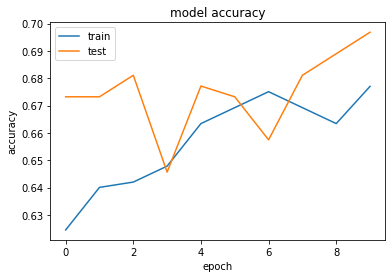

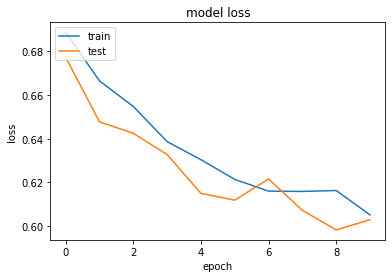

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/1_my_talks/Programs/DLwithCNN/dataset/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=10, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

---



<center>
   <img width="400" height="250" src="https://drive.google.com/uc?id=1LdciBzE4Oc__NE00Bw0TisofYTP0qGc0" >
</center>

